# Create Anderson's summary index
The following code creates a single summary index as per [Anderson](http://amstat.tandfonline.com/doi/abs/10.1198/016214508000000841#.V4G6KFfwxHU).  The approach Anderson uses is as follows:

1. Normalize each outcome variable by subtracting the mean and dividing by the standard deviation of the control group. In symbols, calculate:

$$\tilde{y}_{ik}=\frac{y_{ik}-\bar{y}_k}{\sigma_{k,c}}$$

Where i indexes observations and k indexes outcomes.  

2. Calculate \\( \hat{\Sigma} \\), the sample variance covariance matrix for this vector of transformed outcomes
3. Calculate \\( \mathbf{s\_i}=\hat{\Sigma}^{-1}\cdot \mathbf{\tilde{y_i}} \\) the dot product of the inverse of the sample variance covariance matrix and the vector of outcomes for each observation
4. Add up the elements of  \\( \mathbf{s\_i} \\) to get your final index

Note 1: Anderson also divides the final index by a normalizing factor.  This might be useful if you want to compare the coefficients on different indices but it won't affect p-value so I have left this out. 

Note 2: You must have the pandas and numpy packages installed to run this code. If you install Python using [Anaconda](https://www.continuum.io/downloads) these two packages will be automatically installed.  

In [76]:
# Import packages
import pandas as pd
import numpy as np

# Read in a sample dataset
df = pd.read_csv("https://raw.githubusercontent.com/pydata/pandas/master/pandas/tests/data/iris.csv")

In [78]:
# Create a new variable "treat" and randomly assign it a value of 0 or 1. This is required because our sample 
# dataset has no treatment variable.
df['treat'] = np.random.binomial(1, .5, df.shape[0])

# test the effect of adding a bunch of NaNs. For testing purposes only
# df.iloc[20:][['PetalLength']] = np.NaN

# note that the next line creates a copy of the dataframe with just the specified columns
vars = df[['SepalLength','SepalWidth','PetalLength', 'PetalWidth']]
# normalize these variables.  note that the mean and std functions exclude NaN values on a column-wise basis
# that is, if there is a NaN value in one row for one column that row will only be excluded in the calcs for that one 
# column
vars_t = (vars-vars.mean())/vars[df.treat==1].std()
sigma_inv = np.linalg.inv(vars_t.cov())
# replace any missing values in vars_t with 0
vars_t = vars_t.fillna(0)
s = np.dot(sigma_inv,vars_t.T).T
index = np.dot(s,np.ones(s.shape[1]))
# add the index as a column to the dataframe
df['index']=pd.Series(index)

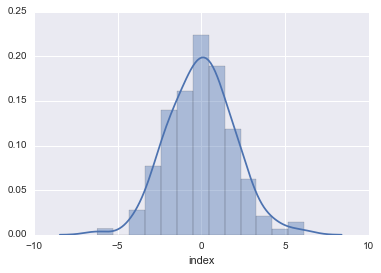

In [79]:
# look at the distribution of index
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['index'])